US Corn Balance Sheet Forecast (2025)

1. Project Objective

Use machine learning to forecast some attributs of the 2025/26 US corn balance sheet using historical data and various regression models for Mike North. Calculate dependent attributes accordingly. Assume traditional abandonment rates, and a planted acres of 94.5 million acres. Assume 12.5% stocks to use ratio. Forecast yield, production, total imports, total demand, US ending stocks, and Avg farm price. Evaluate model accuracy and compare approaches.

2. Data Overview
- Source: Manually collected USDA data from WASDE reports, legacy Blimling file.
- File: `corn.xlsx`, sheet: `Forecast`

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#1. Load File
file_path = 'corn.xlsx'
df = pd.read_excel(file_path, sheet_name='Forecast')
df = df[df['Year'] >= 2002]
df = df[df['Year'] != 2012] #dropping 2012 as it was an outlier (severe drought year)

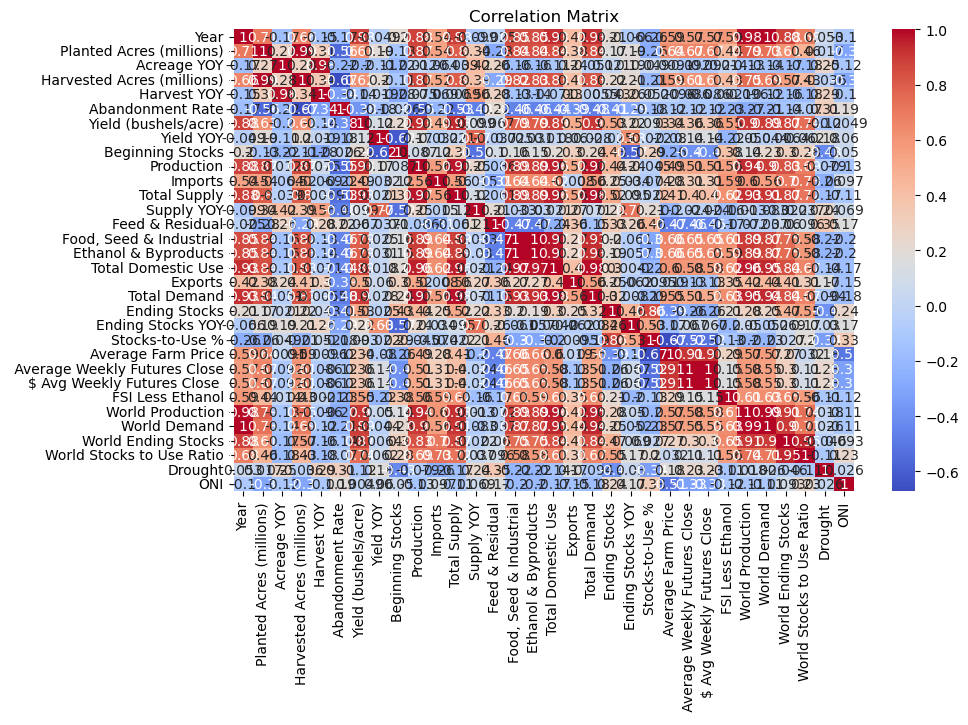

In [23]:
# 2. Correlation matrix to identify features
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
#3 Look for specific correlations between yield, total imports, total demand, US ending stocks, and Avg farm price.
correlation_matrix = df.corr()
print(correlation_matrix['Ending Stocks'])
print("   ")
print(correlation_matrix['Yield (bushels/acre)'])
print("   ")
print(correlation_matrix['Total Demand'])
print("   ")
print(correlation_matrix['Average Farm Price'])

Year                             0.209002
Planted Acres (millions)         0.170004
Acreage YOY                      0.021263
Harvested Acres (millions)       0.220087
Harvest YOY                      0.043312
Abandonment Rate                -0.412966
Yield (bushels/acre)             0.531137
Yield YOY                       -0.024746
Beginning Stocks                 0.431850
Production                       0.437908
Imports                          0.252199
Total Supply                     0.516352
Supply YOY                       0.218178
Feed & Residual                  0.330550
Food, Seed & Industrial          0.195298
Ethanol & Byproducts             0.193043
Total Domestic Use               0.304896
Exports                          0.248352
Total Demand                     0.324610
Ending Stocks                    1.000000
Ending Stocks YOY                0.459667
Stocks-to-Use %                  0.859994
Average Farm Price              -0.385225
 Average Weekly Futures Close   -0

/var/folders/gw/3ts7pskn4ws9wsxn3lkd3h280000gn/T/ipykernel_82854/2762151789.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Linear Regression R²: 0.71
Linear Regression RMSE: 9.87
Predicted Yield for 2025: 180.11 bushels/acre


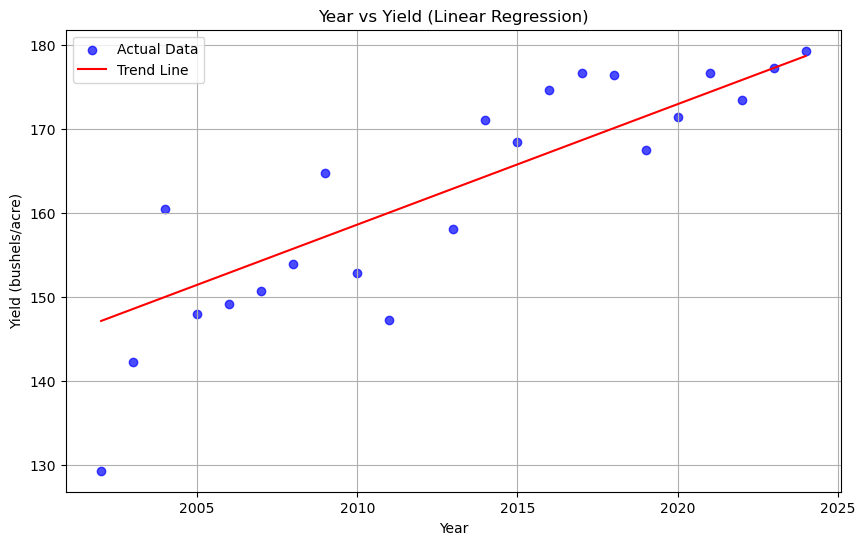

In [20]:
#4. Modeling: Yield Forecast (linear regression)

X = df[['Year']]
y = df['Yield (bushels/acre)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression R²: {r2:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

forecast_2025 = pd.DataFrame({'Year': [2025]})
predicted_yield_2025 = lr_model.predict(forecast_2025)[0]
print(f"Predicted Yield for 2025: {predicted_yield_2025:.2f} bushels/acre")

# Plot predictions against actual
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')
plt.plot(X, lr_model.predict(X), color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Yield (bushels/acre)')
plt.title('Year vs Yield (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


Linear Regression R²: 0.68
Linear Regression RMSE: 1344.95
Predicted Production for 2025: 15295.78 bushels


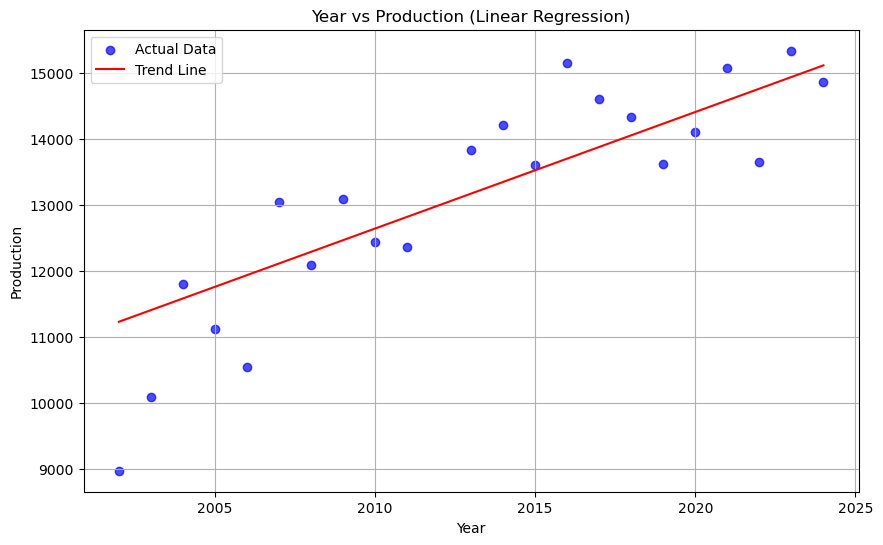

In [18]:
#5. Modeling Production (linear regression)


X = df[['Year']]
y = df['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression R²: {r2:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

forecast_2025 = pd.DataFrame({'Year': [2025]})
predicted_production_2025 = lr_model.predict(forecast_2025)[0]
print(f"Predicted Production for 2025: {predicted_production_2025:.2f} bushels")

#Plot Prediction
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')
plt.plot(X, lr_model.predict(X), color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Year vs Production (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


Random Forest R²: 0.78
Random Forest RMSE: 7.44
Predicted Imports for 2025 (Random Forest): 27.00 million bushels


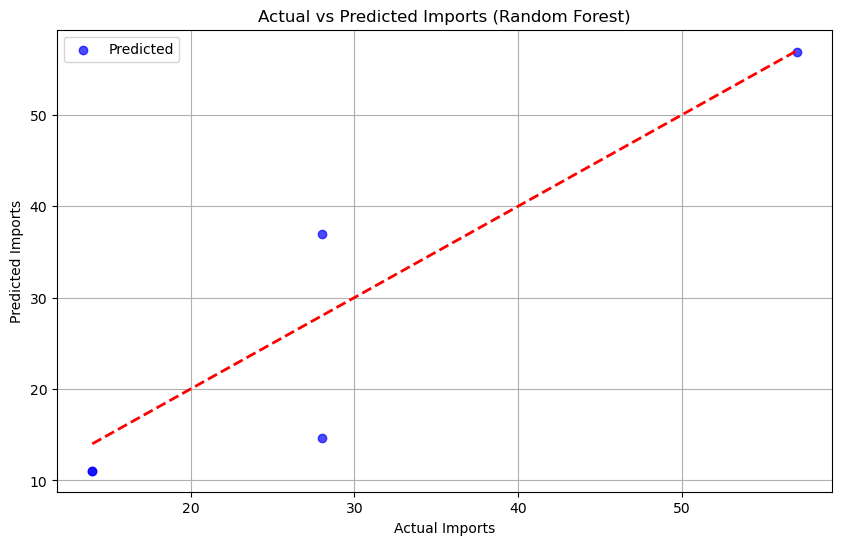

In [7]:
#6 Modeling: Imports (Random Forest)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


X = df[['Year']]
y = df['Imports']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest R²: {r2_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

forecast_2025 = pd.DataFrame({'Year': [2025]})
predicted_imports_rf = rf_model.predict(forecast_2025)[0]
print(f"Predicted Imports for 2025 (Random Forest): {predicted_imports_rf:.2f} million bushels")

# Plot predicted against actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Imports')
plt.ylabel('Predicted Imports')
plt.title('Actual vs Predicted Imports (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#7. Modeling: Total Demand (linear regression)

features = ['Total Supply', 'Production', 'Yield (bushels/acre)', 'Ending Stocks']
target = 'Total Demand'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Totaly Supply is manually calculated: Imports + Production + Beginning stocks (ending stocks for 2023/24)
forecast_2025 = pd.DataFrame({
    'Total Supply': [16937],
    'Production': [15295.78],
    'Yield (bushels/acre)': [180.10],
    'Ending Stocks': [1889]
})

predicted_demand_2025 = model.predict(forecast_2025)[0]

print("Predicted Total Demand 2025:", model.predict(forecast_2025)[0])

Predicted Total Demand 2025: 15050.907710190491


In [16]:
#8. Modeling: Ending Stocks (Comparing Linear Regression, Random Forest and Gradient Boosting)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Features chosen based on correlation matrix
X = df[['Harvested Acres (millions)', 'Yield (bushels/acre)', 'Production',
         'Planted Acres (millions)', 'Total Supply', ' Average Weekly Futures Close',
         'Stocks-to-Use %','Beginning Stocks', 'Total Demand']]
y = df['Ending Stocks']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Linear Regression R²: {r2_lr:.2f}, RMSE: {rmse_lr:.2f}")


# Random Forest with GridSearchCV 
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Optimized Random Forest R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}")

#Gradient Boosting with GridSearchCV 

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
gb = GradientBoostingRegressor(random_state=42)

grid_gb = GridSearchCV(gb, param_grid_gb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f"Optimized Gradient Boosting R²: {r2_gb:.2f}, RMSE: {rmse_gb:.2f}")

# Forecast for 2025/26

forecast_2025 = pd.DataFrame({
    'Harvested Acres (millions)': [85.43], #calculated from asusmptions
    'Yield (bushels/acre)': [180.1], #predicted above
    'Production': [15370],#predicted above
    'Planted Acres (millions)': [94.4],#given assumption
    'Total Supply': [16973], #calculated from asusmptions
    ' Average Weekly Futures Close': [461], #current nearby price
    'Stocks-to-Use %': [12.5], #given assumption from Mike
    'Beginning Stocks': [1540], #ending stocks 2024/25
    'Total Demand': [15050] #calculated above
})

print(f"Predicted Ending Stocks for 2025 (Linear Regression): {lr_model.predict(forecast_2025)[0]:.2f} million bushels")
print(f"Predicted Ending Stocks for 2025 (Random Forest): {best_rf.predict(forecast_2025)[0]:.2f} million bushels")
print(f"Predicted Ending Stocks for 2025 (Gradient Boosting): {best_gb.predict(forecast_2025)[0]:.2f} million bushels")

gb.fit(X_train, y_train)


predicted_ending_2025 = best_rf.predict(forecast_2025)[0]


Linear Regression R²: 1.00, RMSE: 16.83
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimized Random Forest R²: 0.80, RMSE: 263.99
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimized Gradient Boosting R²: 0.90, RMSE: 190.20
Predicted Ending Stocks for 2025 (Linear Regression): 7351.20 million bushels
Predicted Ending Stocks for 2025 (Random Forest): 1846.09 million bushels
Predicted Ending Stocks for 2025 (Gradient Boosting): 1974.65 million bushels


In [10]:
#9. Modeling: Average Farm Price (Comparing Random Forest Regressor and XGboost)


X = df[['Year', 'Stocks-to-Use %', 'Total Supply', 'Total Demand', 'Planted Acres (millions)', " Average Weekly Futures Close"]]
y = df['Average Farm Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_estimators=400, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
r2 = rf_model.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RFR R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


forecast_features = {'Year': 2025, 'Stocks-to-Use %': 12.5, 'Total Supply': 16937, 'Total Demand': 15050, 'Planted Acres (millions)': 94.4,' Average Weekly Futures Close': 461}
forecast_df = pd.DataFrame([forecast_features])
predicted_price = rf_model.predict(forecast_df)[0]
print(f"Agv farm price: ${predicted_price:.2f}")


# Train an XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=75, max_depth=2, learning_rate=0.08, min_child_weight=1, subsample=0.6, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print(f"XGBoost R²: {r2_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

# Predict Average Farm Price for 2025
predicted_farm_price_xgb = xgb_model.predict(forecast_df)[0]
print(f"Predicted Average Farm Price for 2025 (XGBoost): ${predicted_farm_price_xgb:.2f}")

RFR R²: 0.66
RMSE: 0.60
Agv farm price: $4.12
XGBoost R²: 0.62
XGBoost RMSE: 0.63
Predicted Average Farm Price for 2025 (XGBoost): $4.12


In [24]:
# Summarize Predictions into a Summary table 
final_forecast = {
    "Component": [
        "Yield (bu/acre)",
        "Production (mil bu)",
        "Imports (mil bu)",
        "Total Demand (mil bu)",
        "Ending Stocks (mil bu)",
        "Avg Farm Price ($/bu)"
    ],
    "Forecast Value": [
        round(predicted_yield_2025, 2),
        round(predicted_production_2025, 2),
        round(predicted_imports_rf, 2),
        round(predicted_demand_2025, 2),
        round(predicted_ending_2025, 2),
        round(predicted_price, 2) 
    ]
}

forecast_df_final = pd.DataFrame(final_forecast)
print("US Corn Balance Sheet Forecast for 2025:")
display(forecast_df_final)

US Corn Balance Sheet Forecast for 2025:


,Component,Forecast Value
0,Yield (bu/acre),180.11
1,Production (mil bu),15295.78
2,Imports (mil bu),27.00
3,Total Demand (mil bu),15050.91
4,Ending Stocks (mil bu),1846.09
5,Avg Farm Price ($/bu),4.12


## 9. Conclusion
- Feature selection and tuning affected performance
- Random Forests and XGBoost captured nonlinear relationships better than linear models
- Additional improvements could include:
  - Adding state-level weather data
  - Testing ensemble average of all models
- Next steps:
  Update the 2025/26 balance sheet with these predictions and assumptions, back-calculating for other attributes and use demand share percentages consistent with previous crop years. 
  

